In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [159]:
df = pd.read_csv('Housing.csv', index_col='Unnamed: 0')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [160]:
x = df[['lotsize']] #,'bedrooms','bathrms'
y = df['price']
x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()

In [161]:
print(x.min())
print(x.max())

lotsize   -1.614395
dtype: float64
lotsize    5.096368
dtype: float64


In [162]:
df.shape

(546, 12)

In [163]:
df.describe(include='all')

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546,546,546,546,546,546.000000,546
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,469,449,355,521,373,NaN,418
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,NaN,NaN,NaN,NaN,NaN,0.692308,NaN
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,NaN,NaN,NaN,NaN,NaN,0.861307,NaN
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [164]:
df.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


In [165]:
df.driveway = df.driveway.eq('yes').mul(1)
df.recroom = df.recroom.eq('yes').mul(1)
df.fullbase = df.fullbase.eq('yes').mul(1)
df.gashw = df.gashw.eq('yes').mul(1)
df.airco = df.airco.eq('yes').mul(1)
df.prefarea = df.prefarea.eq('yes').mul(1)

In [166]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,1,0,1,0,0,1,0
2,38500.0,4000,2,1,1,1,0,0,0,0,0,0
3,49500.0,3060,3,1,1,1,0,0,0,0,0,0
4,60500.0,6650,3,1,2,1,1,0,0,0,0,0
5,61000.0,6360,2,1,1,1,0,0,0,0,0,0


In [167]:
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

In [168]:
def local_regression(x0, X, Y, tau):
    #print("inside local")
    xr = radial_kernel(x0,X,tau)
    #print("CC")
    xw = (X.T)*xr
    #print("EE")
    w = np.linalg.pinv(xw @ X) @ xw @ Y
    #print("DD")
    return x0*w

In [169]:
x = df[['lotsize']] #,'bedrooms','bathrms'
y = df['price']
x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()
X = x
Y = y
def plot_lwr(tau):
    # prediction
    #print("AA")
    domain = np.linspace(-1.6,5, num=415)
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    #print("BB")
    #plot = plt.figure(plt_width=400, plt_height=400)
    plt.rcParams["figure.figsize"] = [13,5]
    plt.title.text = 'tau=%g' % tau
    #plt.scatter(X, Y, alpha=.3)
    plt.plot(domain, prediction,X,Y,'rx')
    
    
    return prediction

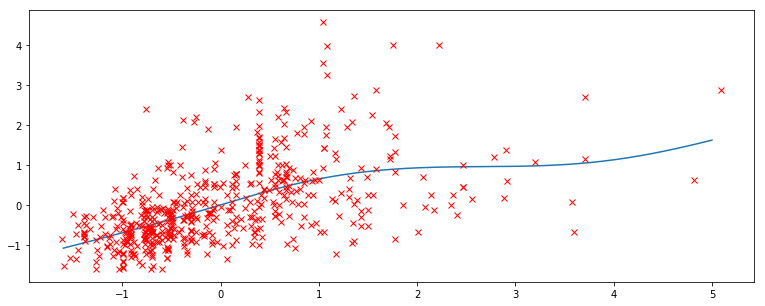

In [170]:
pred = plot_lwr(1)

Plot for tau = 1

In [171]:
l = y.shape[0]
error=0
for i in range(1,400):
    f = pred[i]['lotsize'] - y[i]
    f = f*f
    error = error + f
error = error*(1/800)
error

0.7541604789706421

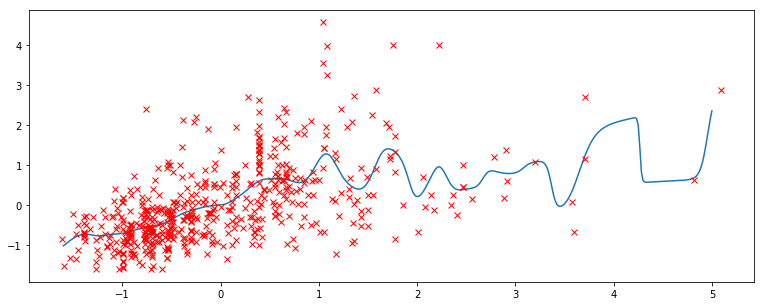

In [172]:
pred = plot_lwr(0.1)

Plot for tau = 0.1

In [173]:
l = y.shape[0]
error=0
for i in range(1,400):
    f = pred[i]['lotsize'] - y[i]
    f = f*f
    error = error + f
error = error*(1/800)
error

0.7911585974265595

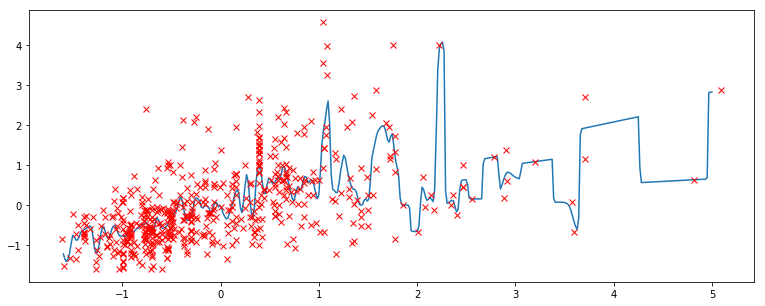

In [186]:
pred = plot_lwr(0.02)

Plot for tau = 0.02

In [188]:
l = y.shape[0]
error=0
for i in range(1,400):
    f = pred[i]['lotsize'] - y[i]
    f = f*f
    error = error + f
error = error*(1/800)
error

0.9840741331372403

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in matmul
  import sys


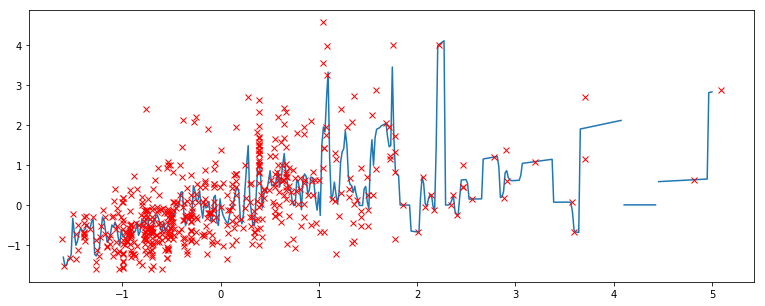

In [189]:
pred = plot_lwr(0.01)

Plot for tau = 0.01(small value)

In [190]:
l = y.shape[0]
error=0
for i in range(1,400):
    f = pred[i]['lotsize'] - y[i]
    f = f*f
    error = error + f
error = error*(1/800)
error

nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in matmul
  import sys


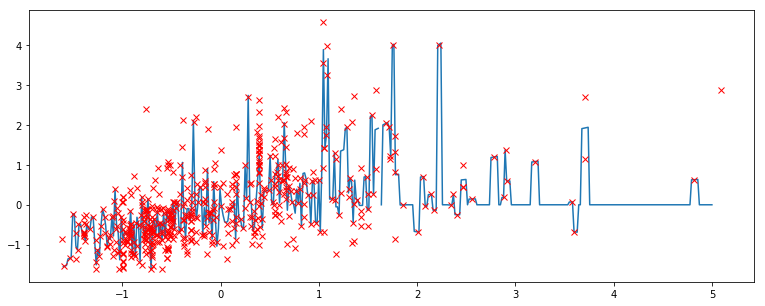

In [196]:
pred = plot_lwr(0.001)

Plot for tau = 0.001(small value)

In [192]:
l = y.shape[0]
error=0
for i in range(1,400):
    f = pred[i]['lotsize'] - y[i]
    f = f*f
    error = error + f
error = error*(1/800)
error

nan

# Conclusion

1. As we can see if tau is very small than their will be overfitting of the data.
2. For tau less than or equal to 0.01 error is coming nan.